<a href="https://colab.research.google.com/github/Satish-Kumar-1/Basics-Deep-learning-projects/blob/main/Building_simple_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import Normalizer

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [ ]:
data = pd.read_csv(r"/content/mnist_train.csv")

y = data['label']
x = data.drop(columns = 'label', axis = 1)

In [ ]:
x.sample(10).iloc[:, 200:]

,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
16534,0.0,0.0,0.0,0.0,0.0,0.0,214.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4677,0.0,0.0,0.0,0.0,200.0,252.0,252.0,252.0,247.0,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23720,0.0,0.0,0.0,0.0,0.0,179.0,254.0,231.0,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20432,0.0,0.0,132.0,246.0,129.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19451,0.0,0.0,0.0,0.0,0.0,60.0,255.0,253.0,253.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18549,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12702,0.0,0.0,0.0,0.0,1.0,70.0,233.0,254.0,254.0,251.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


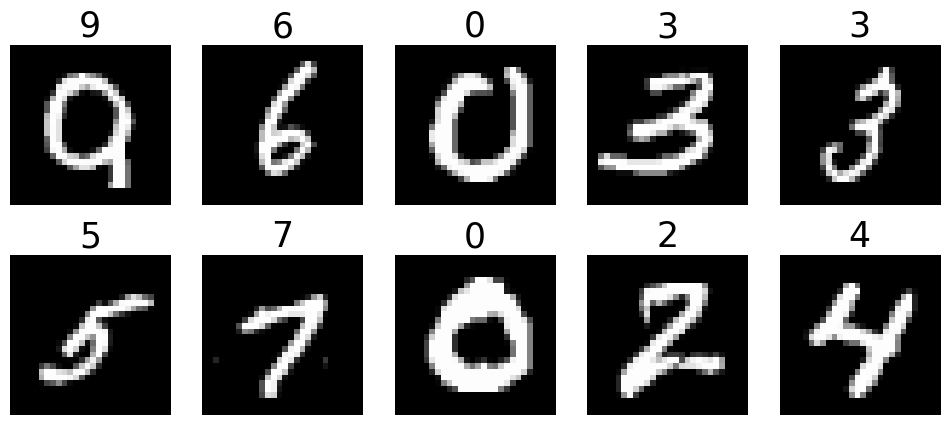

In [ ]:
## plot some samples
fig, axes = plt.subplots(2, 5 , figsize = (12, 5))

axes = axes.flatten()

idx = np.random.randint(0, 6000, size = 10)

# print(idx)

for i in range(10):
    axes[i].imshow(x.iloc[idx[i],:].values.reshape(28,28), cmap='gray')
    # axes[i].imshow(x.iloc[idx[i],:].values.reshape(28, 28), cmap = 'gray')
    axes[i].axis('off')
    axes[i].set_title(str(int(y[idx[i]])), color = 'black', fontsize = 25)

plt.show()

In [ ]:
# train-test-val dataset splitting

x_t, x_test, y_t, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size = 0.2, random_state = 42)

In [ ]:
x_train = x_train.dropna()

In [ ]:
normalizer = Normalizer()
x_train = normalizer.fit_transform(x_train)
x_val = normalizer.fit_transform(x_val)
x_test = normalizer.fit_transform(x_test)

In [ ]:
print(f"x_train.shape: {x_train.shape}, x_val.shape: {x_val.shape} and x_test.shape: {x_test.shape}")

x_train.shape: (15775, 784), x_val.shape: (3944, 784) and x_test.shape: (4930, 784)


In [ ]:
## Dataset and Dataloader class

class CustomDataset(Dataset):

    def __init__(self, features, label):
        self.features = features
        self.label = label

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        sample = self.features[idx]
        label = self.label.values[idx]
        sample_tensor = torch.tensor(sample, dtype = torch.float32)
        label_tensor = torch.tensor(label, dtype = torch.long)

        return sample_tensor, label_tensor



In [ ]:
train_dataset = CustomDataset(x_train, y_train)
val_dataset = CustomDataset(x_val, y_val)
test_dataset = CustomDataset(x_test, y_test)

In [ ]:
batch_size = 64
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cpu


In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [ ]:
data, label = next(iter(train_dataloader))
print(data[:, 278:300])
print(label)


tensor([[0.0000, 0.0000, 0.0000,  ..., 0.1375, 0.0092, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0579, 0.1186, 0.1186],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0781, 0.0944, 0.0944]])
tensor([9, 3, 6, 2, 7, 9, 0, 9, 4, 4, 5, 1, 7, 9, 2, 6, 4, 7, 1, 7, 0, 0, 0, 2,
        3, 4, 4, 6, 6, 3, 6, 2, 2, 4, 3, 2, 6, 7, 5, 1, 6, 6, 7, 5, 1, 2, 9, 6,
        0, 5, 4, 1, 8, 3, 9, 4, 0, 9, 3, 8, 4, 9, 5, 4])


In [ ]:
# Simple Model

class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.relu1 = nn.ReLu()
        self.fc2 = nn.Linear(512, 512)
        self.relu2 = nn.ReLu()
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
# Functional Interface

class FunctionalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
## Sequential class

class SeqModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLu(),
            nn.Linear(512, 512),
            nn.ReLu(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.layer(x)



In [ ]:
## Using batch normalization and dropout layers

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.relu1 = nn.ReLU()
        self.dropout_1 = nn.Dropout(p = 0.2)

        self.fc2 = nn.Linear(512, 512)
        self.batch_norm2 = nn.BatchNorm1d(512)
        self.relu2 = nn.ReLU()
        self.dropout_2 = nn.Dropout(p = 0.2)

        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.dropout_1(self.relu1(self.batch_norm1(self.fc1(x))))
        x = self.dropout_2(self.relu2(self.batch_norm2(self.fc2(x))))
        x = self.fc3(x)

        return x



In [ ]:
model = Model().to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
epochs = 100
best_loss = 1e9
patience = 5

In [ ]:
for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_count = 0
    train_pred = 0
    for data, label in train_dataloader:
        data, label = data.to(device), label.to(device)
        pred = model(data)
        loss = loss_func(pred, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_pred += (pred.argmax(1) == label).sum().type(torch.float).item()
        train_count +=1

    train_loss = train_loss / train_count


    with torch.no_grad():
        model.eval()
        val_loss = 0
        val_count = 0
        val_pred = 0

        for data, label in val_dataloader:
            data, label = data.to(device), label.to(device)
            pred  = model(data)
            loss = loss_func(pred, label)
            val_pred += (pred.argmax(1) == label).sum().type(torch.float).item()
            val_count += len(label)
            val_loss += loss.item()

        val_loss = val_loss / val_count

        if val_loss < best_loss:
            count = 0
            best_loss = val_loss
            checkpoint ={
                'epoch' : epoch + 1,
                'model_state_dict' : model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': best_loss
            }
            torch.save(checkpoint, f"Model checkpoint: {epoch+1}")

        else:
            count += 1

        if count == patience:
            print("Early Stopping!!!")
            break

        if epochs % 10 ==0:
            print(f"{epoch+1}: train_loss = {train_loss} | val_loss = {val_loss}")

1: train_loss = 0.6392414886579822 | val_loss = 0.0032409813149282462
2: train_loss = 0.4815919863188315 | val_loss = 0.002994708167143453
3: train_loss = 0.43455535586666966 | val_loss = 0.0026266639202107765
4: train_loss = 0.3979788718194614 | val_loss = 0.0027334930688807735
5: train_loss = 0.37028126364294817 | val_loss = 0.002357496005345068
6: train_loss = 0.3395962018655379 | val_loss = 0.002576810296466215
7: train_loss = 0.31437050671833244 | val_loss = 0.0026673220917884767
8: train_loss = 0.28619732016976546 | val_loss = 0.0024594572990467778
9: train_loss = 0.26893582445407205 | val_loss = 0.002593341497912187
Early Stopping!!!


In [ ]:
## Model Testing

checkpoint_path  = "/content/path_checkpoint.pth"
checkpoint = torch.load(checkpoint_path)

model.load_state_dict(checkpoint['model_state_dict'])

model.eval()

test_dataloader = test_dataloader

test_loss = 0
correct = 0

with torch.no_grad():
    for data, label in test_dataloader:
            data, label = data.to(device), label.to(device)
            pred  = model(data)
            loss = loss_func(pred, label)
            test_loss += loss.item()
            correct += (pred.argmax(1) == label).sum().item()
            # val_count += len(label)


test_loss /= len(test_dataloader.dataset)
test_accuracy = 100. *correct / len(test_dataloader.dataset)

print(f"test_loss = {test_loss} | Test_accuracy = {test_accuracy}%")

EOFError: Ran out of input